<a href="https://colab.research.google.com/github/ilhamAdhim/Dicoding---Belajar-Pengembangan-Machine-Learning/blob/main/Latihan_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


1. **Tokenization** <br>
Tokenization is the first thing to do in NLP, The purpose of tokenization is to give each registered words into a token / number so that it can be identified by the ML model 


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [2]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

In [3]:
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

In [4]:
tokenizer.fit_on_texts(teks)

In [5]:
sequences = tokenizer.texts_to_sequences(teks)

In [20]:
print("ini hasil tokenisasi : ", tokenizer.word_index)

ini hasil tokenisasi :  {'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)
print(sequences_samapanjang)

[[ 0  0  0  3  4  2]
 [ 0  0  0  2  5  6]
 [ 7  8  9 10 11 12]]


In [17]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=7)

sequences_samapanjangtruncate = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=7,
                                      truncating='post')

In [16]:
print(sequences_samapanjangtruncate)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 7  8  9 10 11]]


In [18]:
print(sequences_samapanjang)


[[ 3  4  2  0  0  0  0]
 [ 2  5  6  0  0  0  0]
 [ 7  8  9 10 11 12  0]]




---

2. **Embedding** <br>
Embedding plays role as a text classification. This can be done by mapping the text into vector or lines. The similar words will have similar vector value too.  

In [29]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(jumlah_kata, dimensi_embedding, panjang_input),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [28]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [27]:
# num_epochs = 30
# model.fit(padded_latih, label_latih, 
#           epochs=num_epochs, 
#           validation_data=(padded_test, label_test))



---

**Praktek - Binary Text Classification**


In [32]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dicoding - NLP - Sentiment Analysis /yelp_labelled.txt', names=['sentence', 'label'], sep='\t')
print(df)

                                              sentence  label
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [35]:
# Lihat 5 row data sample terakhir
df.tail()

,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [36]:
# Membagi 1000 dataset ke training set dan test set
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [38]:
"""
Agar teks dapat dipahami oleh model, kita harus lakukan tokenisasi. 
Gunakan fungsi tokenizer pada data latih dan data test. 
Jangan lupa gunakan fungsi pad_sequences agar setiap sequence sama panjang.
"""
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [39]:
# Pembuatan model untuk training data, Lebih cocok menggunakan GlobalAveragePooling1D dibanding Flatten untuk case NLP.
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 1s - loss: 0.6927 - accuracy: 0.5288 - val_loss: 0.6929 - val_accuracy: 0.4700
Epoch 2/30
25/25 - 0s - loss: 0.6902 - accuracy: 0.6050 - val_loss: 0.6912 - val_accuracy: 0.5450
Epoch 3/30
25/25 - 0s - loss: 0.6869 - accuracy: 0.6288 - val_loss: 0.6888 - val_accuracy: 0.5550
Epoch 4/30
25/25 - 0s - loss: 0.6811 - accuracy: 0.6587 - val_loss: 0.6846 - val_accuracy: 0.5950
Epoch 5/30
25/25 - 0s - loss: 0.6729 - accuracy: 0.6762 - val_loss: 0.6793 - val_accuracy: 0.5900
Epoch 6/30
25/25 - 0s - loss: 0.6628 - accuracy: 0.6925 - val_loss: 0.6711 - val_accuracy: 0.6300
Epoch 7/30
25/25 - 0s - loss: 0.6489 - accuracy: 0.7000 - val_loss: 0.6620 - val_accuracy: 0.6300
Epoch 8/30
25/25 - 0s - loss: 0.6307 - accuracy: 0.7312 - val_loss: 0.6524 - val_accuracy: 0.6700
Epoch 9/30
25/25 - 0s - loss: 0.6099 - accuracy: 0.7450 - val_loss: 0.6356 - val_accuracy: 0.6750
Epoch 10/30
25/25 - 0s - loss: 0.5866 - accuracy: 0.7613 - val_loss: 0.6203 - val_accuracy: 0.7100
Epoch 11/30
25/25 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


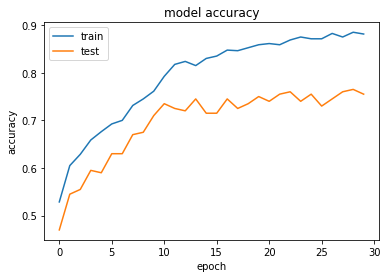

In [44]:
# list all data in history
print(history.history.keys())

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

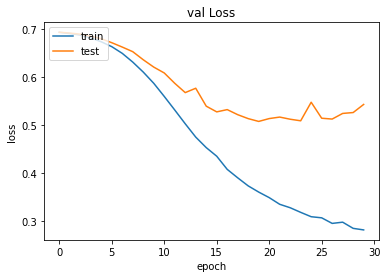

In [46]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('val Loss')
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()